In [ ]:
import pandas as pd  # for data analysis
import numpy as np # for calculation
import matplotlib.pyplot as plt  #for plotting graph
import seaborn as sns  # for plotting graphs
from sklearn.feature_selection import SelectKBest   # for feature selection
from sklearn.feature_selection import f_classif, mutual_info_classif   # for feature selection
from sklearn.preprocessing import StandardScaler   # for feature scaling data to lower values
from imblearn.over_sampling import SMOTE   # for oversampling the data
from sklearn.svm import SVC  # 1st model
from sklearn.neighbors import KNeighborsClassifier   # 2nd model
from sklearn.naive_bayes import GaussianNB   # 3rd model
from sklearn.tree import DecisionTreeClassifier  # 4th model
from sklearn.ensemble import RandomForestClassifier  # 5th model
from sklearn.model_selection import train_test_split  # to split data to train and test
from sklearn.model_selection import GridSearchCV   #  one type of cross validation to find out best model and hyperparameters
from imblearn.pipeline import Pipeline   # model pipeline to prevent data leakage
from sklearn.metrics import classification_report   # to find precision, f1 score and recall
from sklearn.metrics import confusion_matrix  # to show the result in heatmap
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/parkinsons.data')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#df.info()

In [ ]:
#df.describe()

In [ ]:
df.drop('name', axis=1, inplace=True)

#Exploratory Data Analysis


In [ ]:
'''plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="status", hue='status', dodge=False)
plt.title('Distribution of Target Variable')
h,l = ax.get_legend_handles_labels()
labels=["Healthy People", "People with Parkinson"]
ax.legend(h,labels, loc="upper left")
plt.show()'''

'plt.figure(figsize=(8, 5))\nax = sns.countplot(data=df, x="status", hue=\'status\', dodge=False)\nplt.title(\'Distribution of Target Variable\')\nh,l = ax.get_legend_handles_labels()\nlabels=["Healthy People", "People with Parkinson"]\nax.legend(h,labels, loc="upper left")\nplt.show()'

In [ ]:
'''plt.figure(figsize=(10, 8))
columns_to_plot = df.columns.drop('status')
ax=sns.boxplot(data=df[columns_to_plot])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()'''

"plt.figure(figsize=(10, 8))\ncolumns_to_plot = df.columns.drop('status')\nax=sns.boxplot(data=df[columns_to_plot])\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\nplt.show()"

In [ ]:
'''data=df['MDVP:Fhi(Hz)']
def remove_outliers_iqr(data, factor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

df['MDVP:Fhi(Hz)'] = remove_outliers_iqr(data)
df=df.dropna()'''

"data=df['MDVP:Fhi(Hz)']\ndef remove_outliers_iqr(data, factor=1.5):\n    q1 = np.percentile(data, 25)\n    q3 = np.percentile(data, 75)\n    iqr = q3 - q1\n    lower_bound = q1 - factor * iqr\n    upper_bound = q3 + factor * iqr\n    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]\n    return filtered_data\n\ndf['MDVP:Fhi(Hz)'] = remove_outliers_iqr(data)\ndf=df.dropna()"

In [ ]:
#df.head()

In [ ]:
#df.describe()

In [ ]:
#df = df[(df['MDVP:Fhi(Hz)'] <= 380)]
#df=df.dropna()

In [ ]:
'''plt.figure(figsize=(10, 8))
columns_to_plot = df.columns.drop('status')
ax=sns.boxplot(data=df[columns_to_plot])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()'''

"plt.figure(figsize=(10, 8))\ncolumns_to_plot = df.columns.drop('status')\nax=sns.boxplot(data=df[columns_to_plot])\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\nplt.show()"

In [ ]:
'''df.hist(figsize=(15,15))
plt.show()'''

'df.hist(figsize=(15,15))\nplt.show()'

In [ ]:
'''columns_to_include = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'spread1', 'spread2', 'PPE', 'status']
sns.pairplot(df[columns_to_include], hue="status", markers=["o", "s"])
plt.show()'''

'columns_to_include = [\'MDVP:Fo(Hz)\', \'MDVP:Flo(Hz)\', \'spread1\', \'spread2\', \'PPE\', \'status\']\nsns.pairplot(df[columns_to_include], hue="status", markers=["o", "s"])\nplt.show()'

In [ ]:
'''plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(1), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', cbar=True, annot_kws={'size':8})
plt.title('Correlation Matrix')
plt.show()'''

"plt.figure(figsize=(8, 8))\nsns.heatmap(df.corr().round(1), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', cbar=True, annot_kws={'size':8})\nplt.title('Correlation Matrix')\nplt.show()"

In [ ]:
#df.groupby('status').mean()

#DATA PREPROCESSING


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(195, 23)

In [ ]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
X = df.drop('status', axis=1)
Y = df['status']

UNIVARIATE FEATURE SELECTION

In [ ]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

def featureSelect_dataframe(X, Y, criteria, k):

    reg = SelectKBest(criteria, k=k).fit(X,Y)
    X_transformed = reg.transform(X)
    selected_feature_indices = reg.get_support(indices=True)
    column_names = X.columns[selected_feature_indices].tolist()

    return print("The most important columns by feature selection method {} are: {}".format(criteria.__name__, f"{column_names}".strip('[]')))'''


'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_classif, mutual_info_classif\n\ndef featureSelect_dataframe(X, Y, criteria, k):\n\n    reg = SelectKBest(criteria, k=k).fit(X,Y)\n    X_transformed = reg.transform(X)\n    selected_feature_indices = reg.get_support(indices=True)\n    column_names = X.columns[selected_feature_indices].tolist()\n\n    return print("The most important columns by feature selection method {} are: {}".format(criteria.__name__, f"{column_names}".strip(\'[]\')))'

In [ ]:
'''feature_f = featureSelect_dataframe(X, Y, f_classif, 5)
feature_mutual = featureSelect_dataframe(X, Y, mutual_info_classif, 5)'''

'feature_f = featureSelect_dataframe(X, Y, f_classif, 5)\nfeature_mutual = featureSelect_dataframe(X, Y, mutual_info_classif, 5)'

# MODEL SELECTION, HYPERPARAMETERS TUNING, FEATURE SCALING & OVERSAMPLING


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42)

param_grid = [
    {
        'classifier': [SVC()],  # SVM model
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly','rbf','sigmoid']
    },
    {
        'classifier': [KNeighborsClassifier()],  # kNN model
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
]

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # to scale the data
    ('smote', SMOTE()),   # to oversample the minority data
    ('classifier', 'passthrough')  # Placeholder for the model
])

In [ ]:
param_grid = [
    {
        'classifier': [SVC()],  # SVM model
        'classifier__C': [0.1, 1, 3, 5, 10],
        'classifier__kernel': ['linear', 'poly','rbf','sigmoid']
    },
    {
        'classifier': [KNeighborsClassifier()],  # kNN model
        'classifier__n_neighbors': [1, 3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    {
        'classifier': [GaussianNB()],  # Gaussian Naive Bayes model
    },
    {
        'classifier': [DecisionTreeClassifier()],  # Decision Tree model
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [3, 6, 9],
        'classifier__max_leaf_nodes': [3, 6, 9],
    },
    {
        'classifier': [RandomForestClassifier()],  # Random Forest model
        'classifier__n_estimators': [25, 50, 100, 150],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [3, 6, 9],
        'classifier__max_leaf_nodes': [3, 6, 9],
    }
]

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('classifier', 'passthrough')]),
             param_grid=[{'classifier': [SVC(C=10)],
                          'classifier__C': [0.1, 1, 3, 5, 10],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [1, 3, 5, 7],
                          'classifier__weights': ['unifo...
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [3, 6, 9],
                          'classifier__max_features': ['sqrt', 'log2', None],
                          'classifier__max_leaf_nodes': [3, 6, 9]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [3, 6, 9],
                          'classifier__max_features': ['sqrt', 'log2', None],
                          'classifier__max_leaf_nodes': [3, 6, 9],
                          'classifier__n_estimators': [25, 50, 100, 150]}],
             scoring='f1')

In [ ]:
print('Best Model:', grid_search.best_estimator_)
print('highest score',  grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('classifier', SVC(C=10))])
highest score 0.9428042017101512
Best Hyperparameters: {'classifier': SVC(C=10), 'classifier__C': 10, 'classifier__kernel': 'rbf'}


In [ ]:
result_df = pd.DataFrame(grid_search.cv_results_)

In [ ]:
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', None)
columns = ['params','mean_test_score','rank_test_score']  # to display the result of GridSearchCV: all the model corresponding it hyperparameters, test score and its ranking
result_df[columns]

,params,mean_test_score,rank_test_score
0,"{'classifier': SVC(C=10), 'classifier__C': 0.1, 'classifier__kernel': 'linear'}",0.856808,114
1,"{'classifier': SVC(C=10), 'classifier__C': 0.1, 'classifier__kernel': 'poly'}",0.899811,28
2,"{'classifier': SVC(C=10), 'classifier__C': 0.1, 'classifier__kernel': 'rbf'}",0.820136,146
3,"{'classifier': SVC(C=10), 'classifier__C': 0.1, 'classifier__kernel': 'sigmoid'}",0.777902,158
4,"{'classifier': SVC(C=10), 'classifier__C': 1, 'classifier__kernel': 'linear'}",0.869320,95
5,"{'classifier': SVC(C=10), 'classifier__C': 1, 'classifier__kernel': 'poly'}",0.916870,12
6,"{'classifier': SVC(C=10), 'classifier__C': 1, 'classifier__kernel': 'rbf'}",0.894257,39
7,"{'classifier': SVC(C=10), 'classifier__C': 1, 'classifier__kernel': 'sigmoid'}",0.817417,148
8,"{'classifier': SVC(C=10), 'classifier__C': 3, 'classifier__kernel': 'linear'}",0.871755,89
9,"{'classifier': SVC(C=10), 'classifier__C': 3, 'classifier__kernel': 'poly'}",0.923620,9


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
pred = best_model.predict(X_test)

In [ ]:
prediction_df = pd.DataFrame({"Actual":Y_test,"Prediction":pred})

In [ ]:
prediction_df.head()

,Actual,Prediction
185,0,0
77,1,1
76,1,1
113,1,1
62,0,0


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



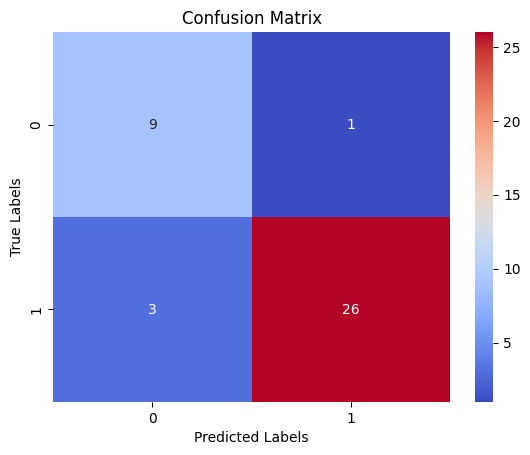

In [ ]:
cm = confusion_matrix(Y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

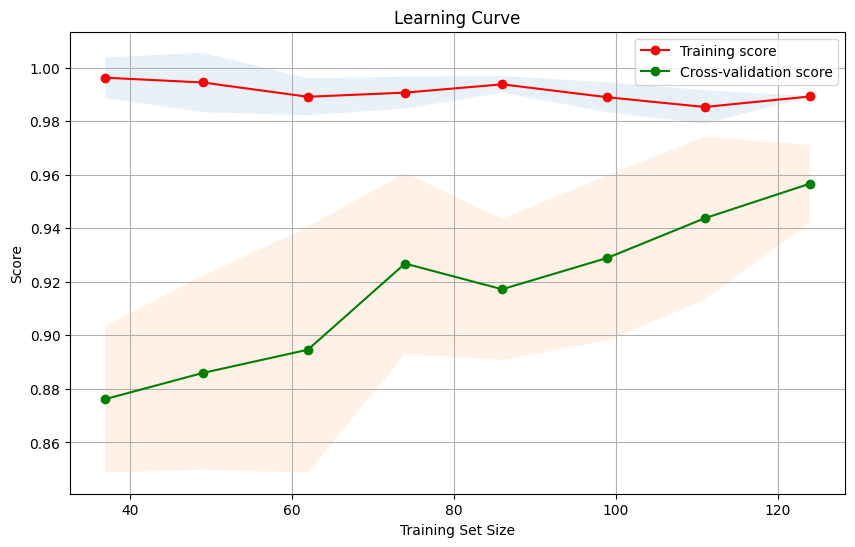

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

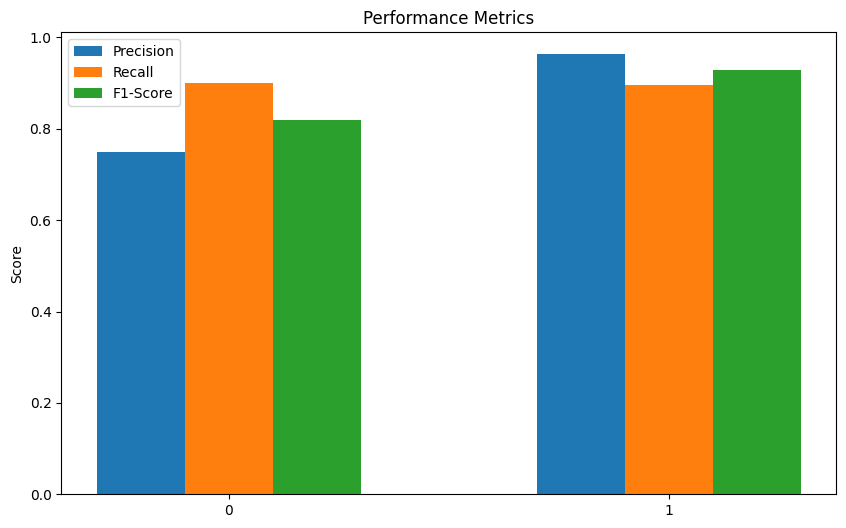

In [ ]:
report= classification_report(Y_test,pred, output_dict=True)
class_names = list(report.keys())[:-3]
precision = []
recall = []
f1_score = []
for class_name in class_names:
    precision.append(report[class_name]['precision'])
    recall.append(report[class_name]['recall'])
    f1_score.append(report[class_name]['f1-score'])

# Plotting the performance metrics
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()